# ESIS Mission Paper

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import pylatex
import kgpy.format
import esis

In [2]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

In [4]:
fig_width = 7.1

In [5]:
esis_optics_design = esis.optics.design.final(all_channels=False)

In [6]:
esis_optics = esis.flight.optics.as_measured()

In [7]:
level_0 = esis.flight.level_0(caching=True)

In [8]:
level_1 = esis.flight.level_1()

<IPython.core.display.Javascript object>


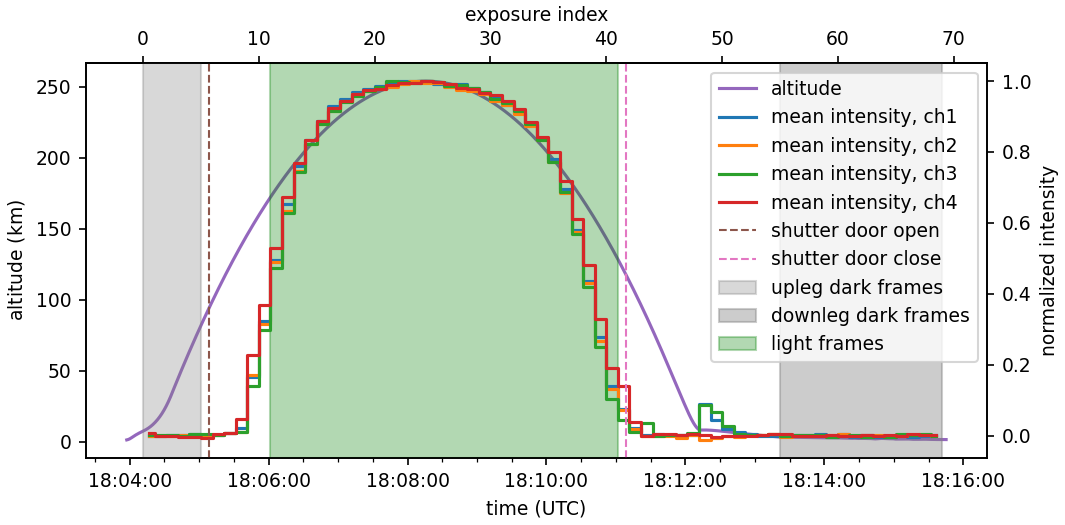

c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:1039: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)
c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [9]:
fig_sig_and_alt, ax_altitude = plt.subplots(figsize=(fig_width,3.5), constrained_layout=True)
level_0.add_index_axis_to_time_axis(ax_altitude);
ax_signal = level_0.plot_altitude_and_signal_vs_time(ax=ax_altitude);
# level_0.timeline.t0.plot(ax=ax_signal, time_start=level_0.time_start)
level_0.timeline.shutter_door_open.plot(ax=ax_signal, time_start=level_0.time_mission_start);
level_0.timeline.shutter_door_close.plot(ax=ax_signal, time_start=level_0.time_mission_start);
level_0.plot_dark_spans(ax=ax_signal)
level_0.plot_signal_span(ax=ax_signal)
fig_sig_and_alt.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax_altitude.transAxes)
fig_sig_and_alt.savefig('figures/signal_and_altitude_vs_time.pdf')

<IPython.core.display.Javascript object>


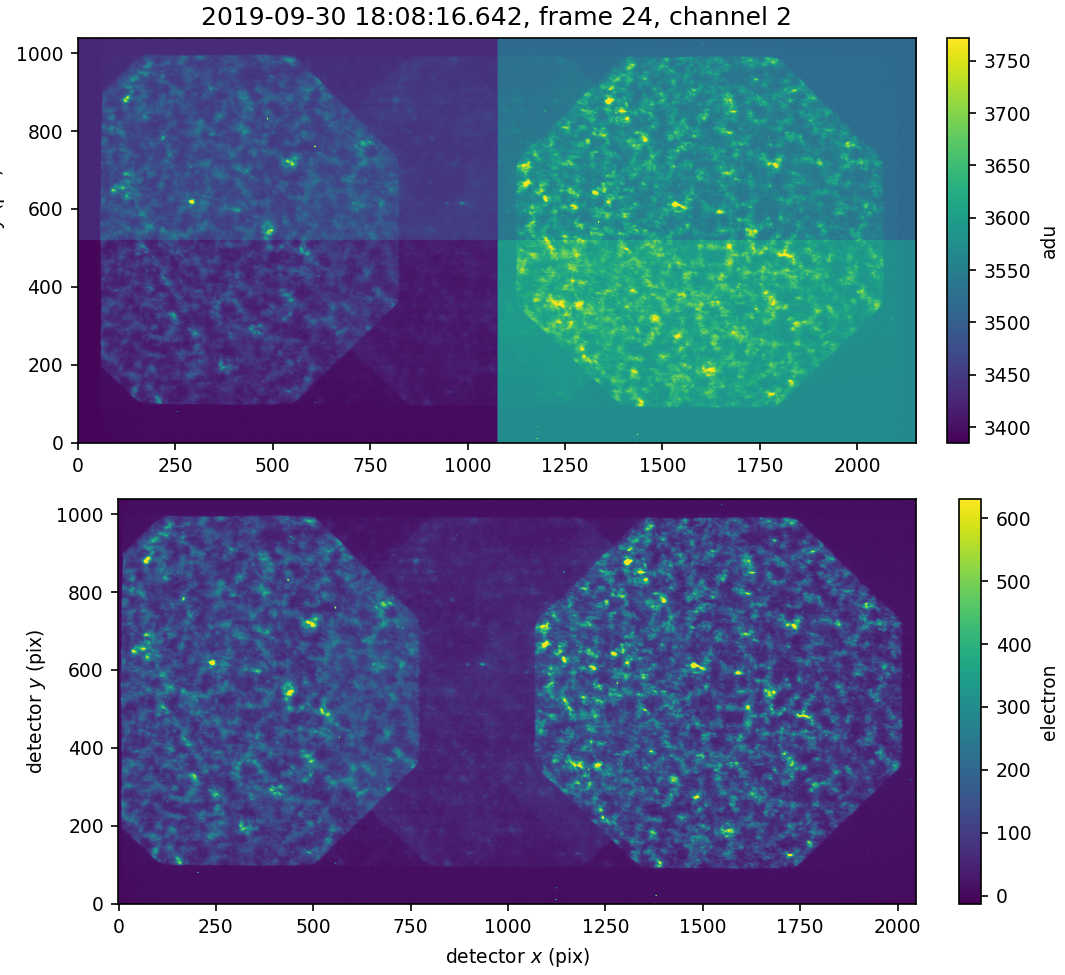

In [10]:
default_channel_index=1
fig_l1, axs_l1 = plt.subplots(
    nrows=2,
#     sharex=True,
#     sharey=True,
    figsize=(fig_width, 6.5), 
    constrained_layout=True,
);
level_0.plot_intensity_channel(
    ax=axs_l1[0],
    time_index=level_0.index_apogee,
    channel_index=default_channel_index,
);
axs_l1[0].set_xlabel(None);
level_0.plot_channel_from_data(
    data=level_0.intensity_electrons,
    ax=axs_l1[1],
    time_index=level_0.index_apogee,
    channel_index=default_channel_index,
);
axs_l1[1].set_title(None);
fig_l1.savefig('figures/L0_to_L1.pdf')

In [11]:
class BasicContainer(pylatex.base_classes.Container):
    def dumps(self):
        result = ''
        for item in self:
            result = result + item.dumps() + '\n'
        return result

In [12]:
def new_variable(name:str, value: str):
    return pylatex.Command('newcommand', [pylatex.NoEscape('\\' + name), pylatex.NoEscape(value)])

In [13]:
doc = BasicContainer()
doc.append(new_variable('defaultChannel', str(int(level_0.channel[default_channel_index].value))))
doc.append(new_variable('dateMission', level_0.time_mission_start.strftime('%B %d, %Y')))
doc.append(new_variable('timeMissionStart', level_0.time_mission_start.strftime('%H:%M:%S')))
doc.append(new_variable('timeShutterOpen', level_0.time_shutter_open.strftime('%H:%M:%S')))
doc.append(new_variable('timeMissionShutterOpen', level_0.timeline.shutter_door_open.time_mission))
doc.append(new_variable('timeShutterClose', level_0.time_shutter_close.strftime('%H:%M:%S')))
doc.append(new_variable('timeMissionShutterClose', level_0.timeline.shutter_door_close.time_mission))
doc.append(new_variable('timeRlgEnable', level_0.time_rlg_enable.strftime('%H:%M:%S')))
doc.append(new_variable('timeMissionRlgEnable', level_0.timeline.sparcs_rlg_enable.time_mission))
doc.append(new_variable('timeRlgDisable', level_0.time_rlg_disable.strftime('%H:%M:%S')))
doc.append(new_variable('timeParachuteDeploy', level_0.time_parachute_deploy.strftime('%H:%M:%S')))
doc.append(new_variable('timeDataStart', level_0.time_exp_start[0].min().strftime('%H:%M:%S')))
doc.append(new_variable('timeDataStop', level_0.time_exp_end[~0].max().strftime('%H:%M:%S')))
doc.append(new_variable('timeLightStart', level_0.time_exp_start[level_0.index_signal_first].min().strftime('%H:%M:%S')))
doc.append(new_variable('timeLightStop', level_0.time_exp_end[level_0.index_signal_last].max().strftime('%H:%M:%S')))
doc.append(new_variable('numDataFrames', level_0.intensity_signal.shape[0]))
doc.append(new_variable('numDarkFrames', level_0.darks.shape[0]))
doc.append(new_variable('imageShape', level_1.intensity.shape[~1:]))
doc.append(new_variable('fov', kgpy.format.quantity((2 * esis_optics.source.half_width_x).to(u.arcmin), digits_after_decimal=1)))
doc.append(new_variable('gain', '{0:0.2f}'.format(esis_optics.detector.gain.mean().value) + r'$\pm$' + kgpy.format.quantity(esis_optics.detector.gain.std(), digits_after_decimal=2)))
doc.append(new_variable('readoutNoise', '{0:0.2f}'.format(esis_optics.detector.readout_noise.mean().value) + r'$\pm$' + kgpy.format.quantity(esis_optics.detector.readout_noise.std(), digits_after_decimal=2)))
doc.append(new_variable('plateScale', kgpy.format.quantity(esis_optics_design.plate_scale.quantity, digits_after_decimal=2)))
doc.append(new_variable('dispersion', kgpy.format.quantity(esis_optics_design.dispersion, digits_after_decimal=3)))
doc.generate_tex('variables_rts')

c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


num 2d secant iterations 3


C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:305: RuntimeWarning: Mean of empty slice
  x=self.x.__array_function__(function, types_x, args_x, kwargs),
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:306: RuntimeWarning: Mean of empty slice
  y=self.y.__array_function__(function, types_y, args_y, kwargs),
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\vector.py:581: RuntimeWarning: Mean of empty slice
  result.z = self.z.__array_function__(function, types_z, args_z, kwargs)
<__array_function__ internals>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in reciprocal
  result = super().__array_ufunc__(

In [14]:
level_0.time_mission_start

<Time object: scale='utc' format='isot' value=2019-09-30T18:03:55.725>

In [15]:
level_0.time_exp_start[0].min().to_value('isot')

'2019-09-30T18:04:11.646'

In [16]:
esis_optics_design.plate_scale.quantity

<Quantity [0.73620827, 0.77145041] arcsec / pix>